# Statistical Learning

In [1]:
import os
import importlib.resources

def get_islp_dataset_names():
    # Get the path to the ISLP package's data directory
    with importlib.resources.path('ISLP', 'data') as data_dir:
        # List all files in the data directory with .csv extension
        dataset_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
        # Extract dataset names by removing the .csv extension
        dataset_names = [os.path.splitext(f)[0] for f in dataset_files]
    return sorted(dataset_names)

dataset_names = get_islp_dataset_names()
print("Datasets available in ISLP.load_data():")
for name in dataset_names:
    print(name)

Datasets available in ISLP.load_data():
Auto
Bikeshare
Boston
BrainCancer
Caravan
Carseats
College
Credit
Default
Fund
Hitters
Khan_xtest
Khan_xtrain
Khan_ytest
Khan_ytrain
NCI60labs
NYSE
OJ
Portfolio
Publication
Smarket
Wage
Weekly


# SECTION A

## Question 1: Difference Between Supervised and Unsupervised Methods

* **Supervised Learning**: Uses labeled data (predictors + response). Goal: predict or classify (e.g., Linear Regression, SVM).
* **Unsupervised Learning**: Uses only predictors without a response. Goal: find patterns/groups (e.g., Clustering, PCA).

## Question 2: Real-Life Applications:
* Classification Example:\
`Application`: Spam email detection.\
`Response`: Spam (1) or Not Spam (0).\
`Predictors`: Email content, sender, keywords.\
`Goal`: Prediction—we want to accurately classify new emails.

* Regression Example:\
`Application`: Predicting house prices.\
`Response`: Price of the house.\
`Predictors`: Size, location, number of rooms.\
`Goal`: Prediction—estimate price for unseen houses.

## Question 3: Why is Naive Bayes “Naïve”?
* It assumes that all predictors are independent given the response.
* This is rarely true in real life (e.g., age and income are not independent), hence the term “naïve.”

## Question 4: Difference Between KNN and K-Means
| KNN (K-Nearest Neighbors)  | K-Means Clustering          |
| -------------------------- | --------------------------- |
| Supervised                 | Unsupervised                |
| Predicts class of new data | Groups data into K clusters |
| Uses labeled data          | No labels used              |
| Lazy learner               | Algorithm learns clusters   |

## Question 5: Ridge vs. Lasso Regression
* Ridge is better when: \
    -Many predictors have small, non-zero effects.\
    -We prefer to shrink coefficients but not eliminate them entirely.
* Ridge keeps all predictors (no variable selection), unlike Lasso, which can set some coefficients to zero.

## Question 6: Confusion Matrix
- A table comparing true vs. predicted classifications.

|          | Predicted Positive | Predicted Negative  |
|-----------------|--------------------|---------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP)| True Negative (TN)  |

- Useful for computing: accuracy, precision, recall, F1 score.

Question 7: Cross-Validation

i. K-Fold Cross-Validation:
- Split data into k equal parts.
- Train on k-1 folds, test on the remaining fold.
- Repeat k times and average the results.

ii. Advantages & Disadvantages:
| Comparison         | K-Fold                            | Validation Set Approach  | LOOCV         |
| ------------------ | --------------------------------- | ------------------------ | ------------- |
| Bias               | Lower bias than single validation | High bias (only 1 split) | Very low bias |
| Variance           | Lower variance                    | High variance            | High variance |
| Computational Cost | Moderate                          | Low                      | Very High     |

- K-fold is a good balance between bias and variance.

## Question 8: Estimating Standard Deviation of Prediction
Use Bootstrap or Cross-Validation:
1. Resample data multiple times.
2. For each sample, predict the response for X.
3. Compute the standard deviation of these predictions.

This gives an estimate of uncertainty in the prediction.

# Question 9: Two Methods for Variable Selection

1. Forward Selection:
- Start with no variables. 
- Add the most significant predictor one by one until no significant improvement.

2. Lasso Regression:
- Penalizes the absolute size of coefficients.
- Automatically shrinks some coefficients to zero (variable selection).

# SECTION B

## Question 1

1. Load the Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Summary Statistics of Expenses

In [3]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

3. Table of People in Each Region

In [4]:
region_counts = df['region'].value_counts()
region_counts

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

4. Scatterplot Matrix

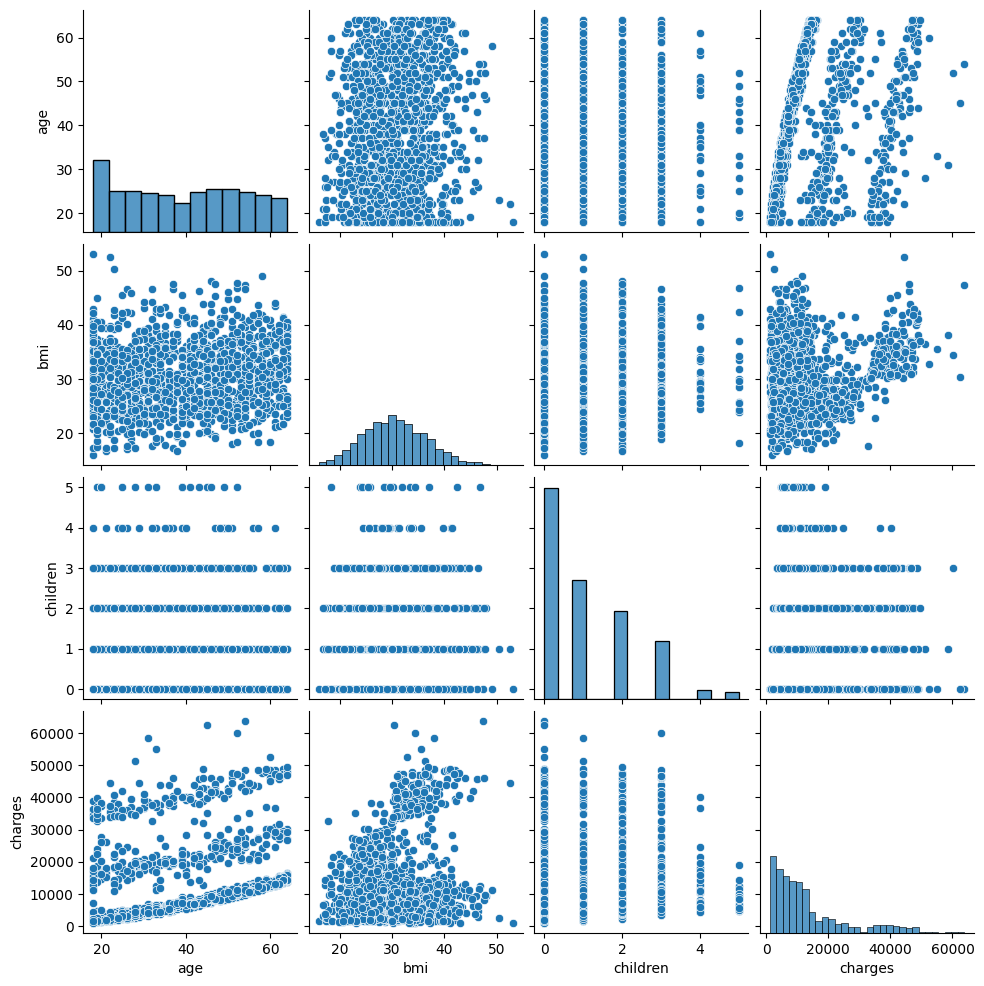

In [5]:
sns.pairplot(df)
plt.show()

5. Train a Simple Linear Regression Model

In [6]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


RMSE: 5796.28
R²: 0.78


6a. Improve with Nonlinear Relationship (Age²)

In [7]:
df_encoded['age_squared'] = df_encoded['age'] ** 2

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'(Nonlinear Age) RMSE: {rmse:.2f}')
print(f'(Nonlinear Age) R²: {r2:.2f}')


(Nonlinear Age) RMSE: 5758.19
(Nonlinear Age) R²: 0.79


6b. Interaction Between Smoking and Obesity (BMI > 30)

In [8]:
df_encoded['obese'] = (df_encoded['bmi'] > 30).astype(int)
df_encoded['smoke_obese'] = df_encoded['smoker_yes'] * df_encoded['obese']

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'(Interaction) RMSE: {rmse:.2f}')
print(f'(Interaction) R²: {r2:.2f}')


(Interaction) RMSE: 4232.58
(Interaction) R²: 0.88


6c. Combine Nonlinear Age + Smoke-Obese Interaction

In [9]:
df_encoded['age_squared'] = df_encoded['age'] ** 2
df_encoded['obese'] = (df_encoded['bmi'] > 30).astype(int)
df_encoded['smoke_obese'] = df_encoded['smoker_yes'] * df_encoded['obese']

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'(Combined) RMSE: {rmse:.2f}')
print(f'(Combined) R²: {r2:.2f}')


(Combined) RMSE: 4232.58
(Combined) R²: 0.88


## Question 2

1. Load the Auto Dataset & Create Binary mpg01

In [10]:
from ISLP import load_data

auto = load_data('auto')

# Create binary mpg01
median_mpg = auto['mpg'].median()
auto['mpg01'] = (auto['mpg'] > median_mpg).astype(int)

2. Exploratory Data Analysis (EDA)

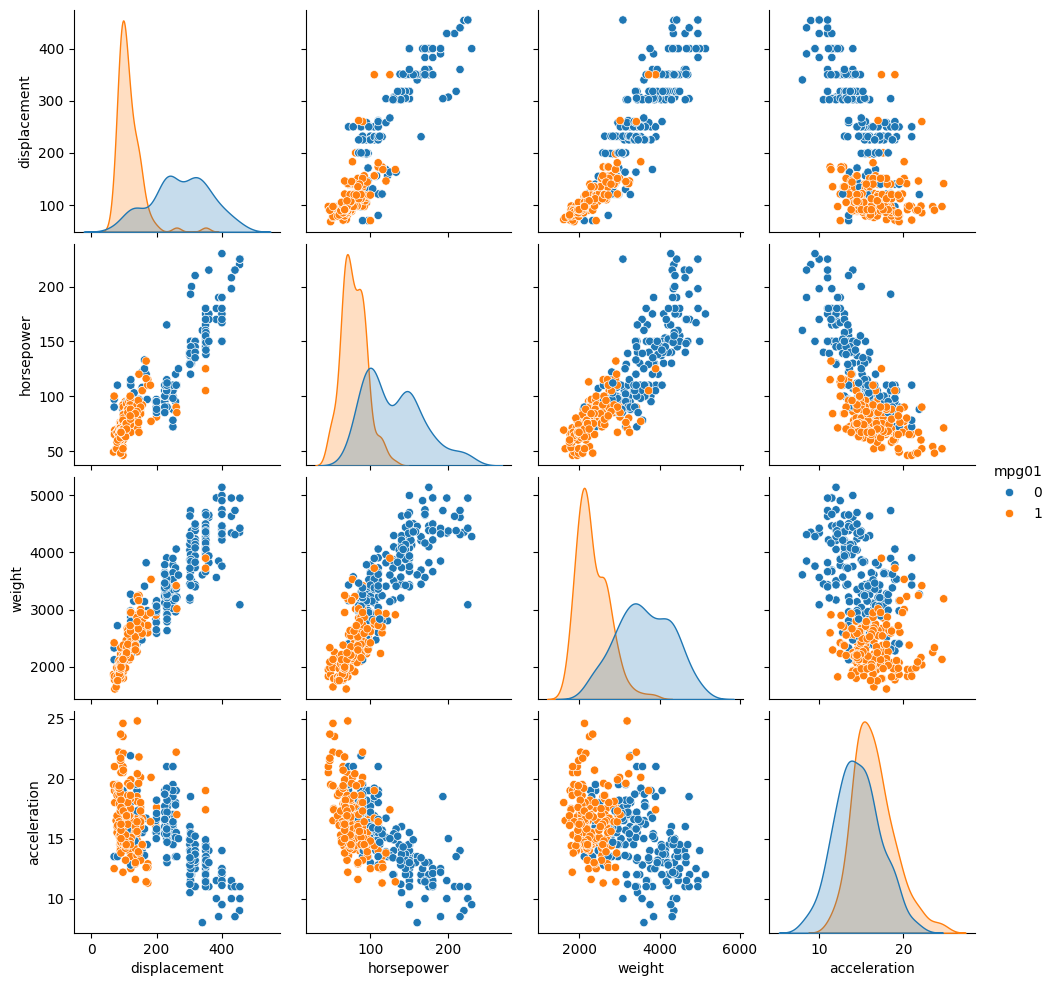

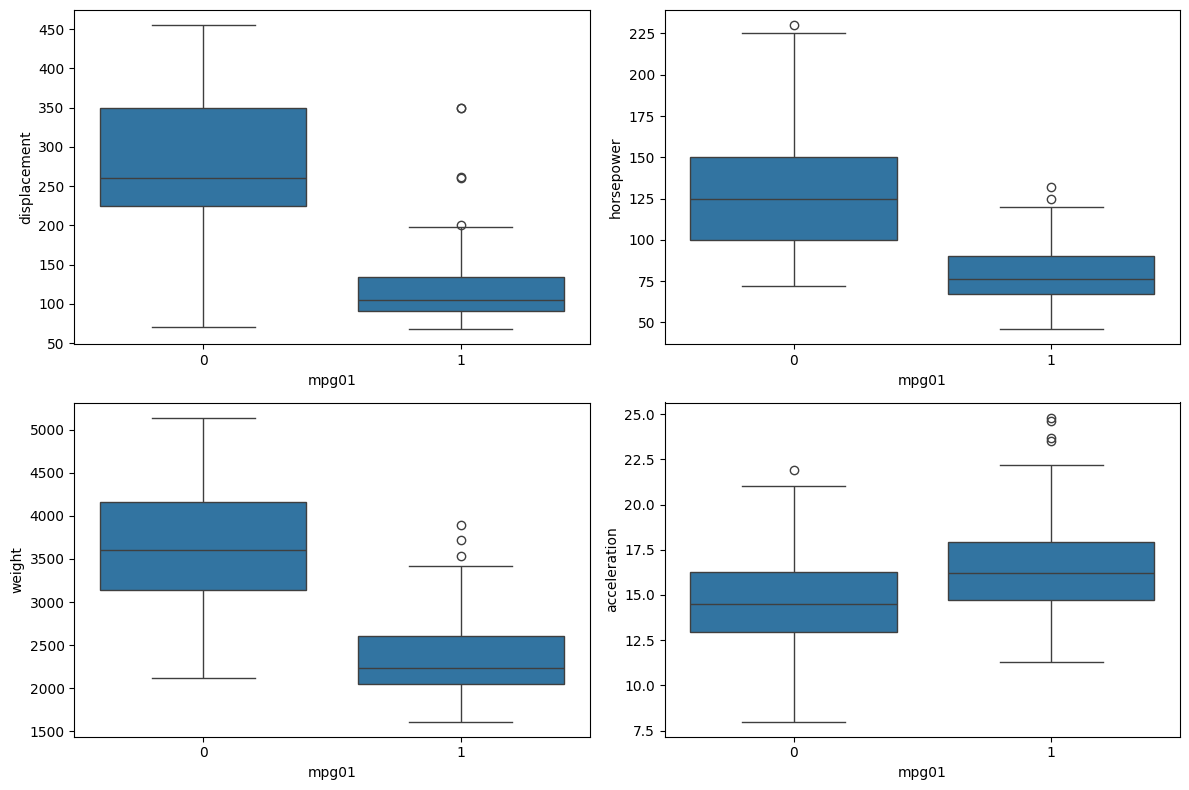

In [11]:
# Pairplot of selected features vs mpg01
sns.pairplot(auto, hue='mpg01', vars=['displacement', 'horsepower', 'weight', 'acceleration'])
plt.show()

# Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='mpg01', y='displacement', data=auto, ax=axes[0,0])
sns.boxplot(x='mpg01', y='horsepower', data=auto, ax=axes[0,1])
sns.boxplot(x='mpg01', y='weight', data=auto, ax=axes[1,0])
sns.boxplot(x='mpg01', y='acceleration', data=auto, ax=axes[1,1])
plt.tight_layout()
plt.show()

3. Split Train/Test

In [12]:
features = ['displacement', 'horsepower', 'weight', 'acceleration']
X = auto[features]
y = auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Linear Discriminant Analysis (LDA)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'LDA Accuracy: {accuracy_lda:.2f}, Test Error: {1 - accuracy_lda:.2f}')

LDA Accuracy: 0.84, Test Error: 0.16


5. Quadratic Discriminant Analysis (QDA)

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f'QDA Accuracy: {accuracy_qda:.2f}, Test Error: {1 - accuracy_qda:.2f}')

QDA Accuracy: 0.83, Test Error: 0.17


6. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log:.2f}, Test Error: {1 - accuracy_log:.2f}')


Logistic Regression Accuracy: 0.85, Test Error: 0.15


7. Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}, Test Error: {1 - accuracy_nb:.2f}')


Naive Bayes Accuracy: 0.83, Test Error: 0.17


8. K-Nearest Neighbors (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f'KNN (k={k}) Accuracy: {accuracy_knn:.2f}, Test Error: {1 - accuracy_knn:.2f}')


KNN (k=1) Accuracy: 0.85, Test Error: 0.15
KNN (k=3) Accuracy: 0.86, Test Error: 0.14
KNN (k=5) Accuracy: 0.84, Test Error: 0.16
KNN (k=7) Accuracy: 0.83, Test Error: 0.17
KNN (k=9) Accuracy: 0.83, Test Error: 0.17
